# Describing Distributions

Josh Johnson

Describing Distributions (Core)

Stack 4, Week 3

11/23/22

In [64]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
eda = pd.read_csv('https://docs.google.com/spreadsheets/d/1APV3pXiAszS_0mSgkiEt9IUNH-QmyX7KwxSAwuADl6Y/gviz/tq?tqx=out:csv&sheet=medical_data',
                usecols=['VitD_levels', 'Doc_visits', 'TotalCharge'])
eda.head()

,VitD_levels,Doc_visits,TotalCharge
0,19.141466,6,3726.702860
1,18.940352,4,4193.190458
2,18.057507,4,2434.234222
3,16.576858,4,2127.830423
4,17.439069,5,2113.073274


Answer the following questions:
* Is it Discrete or Continuous?
* Does it have a skew? If so, which direction (+/-)
* What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)

### continous or discrete?

Doc_visits is discrete, and the other two are continuous.

### Skew and Kurtosis
See below outputs for analysis of skew and kurtosis.

In [69]:
def kurt_and_skew(series):
    print('\n',series.name)
    skew = scipy.stats.skew(series)
    print(f'\nThe skew of {series.name} is {skew}')
    
    kurtosis = scipy.stats.kurtosis(series, fisher=False)
    
    if kurtosis > 3.2:
        kurt_type = 'Leptokurtic'
    elif kurtosis < 2.8:
        kurt_type = 'Platykurtic'
    else:
        kurt_type = 'Mesokurtic'
    
    print(f'The kurtosis of {series.name} is {kurtosis:,.2f}')
    print(f'This means the kurtosis is {kurt_type}')

In [70]:
def plot_distribution(series):
    print(series.name)
    std = series.std()
    mean = series.mean()
    median = series.median()
    mean_plus_std = mean + std
    mean_minus_std = mean - std
    
    fig, ax = plt.subplots(figsize=(6, 3))
    
    sns.histplot(x=series, stat='probability', kde=True)
    ax.axvline(mean, color='red', label=f'Mean = {mean:.2f}')
    ax.axvline(median, color='blue', label=f'Median = {median:.2f}')
    ax.axvline(mean_plus_std, color='green', label=f'+1 std = {mean+std:.2f}')
    ax.axvline(mean_minus_std, color='green', label=f'-1 std = {mean-std:.2f}')
    ax.axvspan(mean_plus_std, mean_minus_std, color='lightgreen', zorder=0)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    kurt_and_skew(series)
    ;

VitD_levels


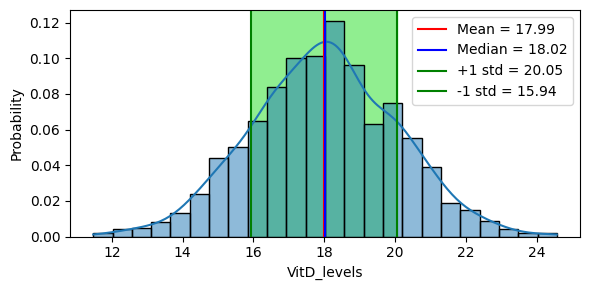


 VitD_levels

The skew of VitD_levels is -0.000271291128424193
The kurtosis of VitD_levels is 3.01
This means the kurtosis is Mesokurtic
Doc_visits


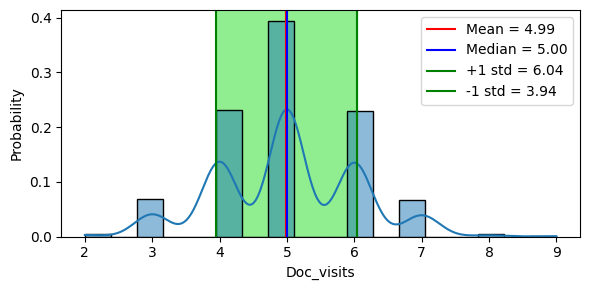


 Doc_visits

The skew of Doc_visits is 0.031597341057387734
The kurtosis of Doc_visits is 2.99
This means the kurtosis is Mesokurtic
TotalCharge


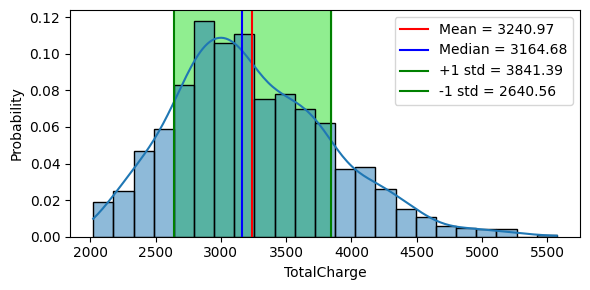


 TotalCharge

The skew of TotalCharge is 0.5839209784354665
The kurtosis of TotalCharge is 3.27
This means the kurtosis is Leptokurtic


In [71]:
for col in eda.columns:
    plot_distribution(eda[col])